[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/Tuchsanai/Pytorch_Einops_Image_demo/blob/main/Pytorch_Arrange_SingleImage.ipynb)


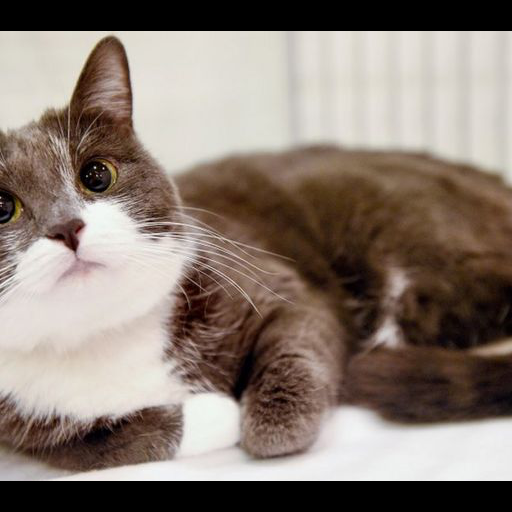

torch.Size([1, 3, 512, 512])

In [4]:
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

loader   = transforms.Compose([   transforms.CenterCrop(512), transforms.ToTensor()])  
unloader = transforms.ToPILImage()

def tensor_to_PIL(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    return image


im             = Image.open('cat.jpg').convert('RGB')
crop_im_tensor = loader(im).unsqueeze(0)

display(tensor_to_PIL(crop_im_tensor))


crop_im_tensor.shape

# 1

In [5]:
import torch
from torch import nn, einsum
from einops import rearrange
from einops.layers.torch import Rearrange, Reduce

patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b (p1 p2 c)  h w', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 49152, 4, 4])

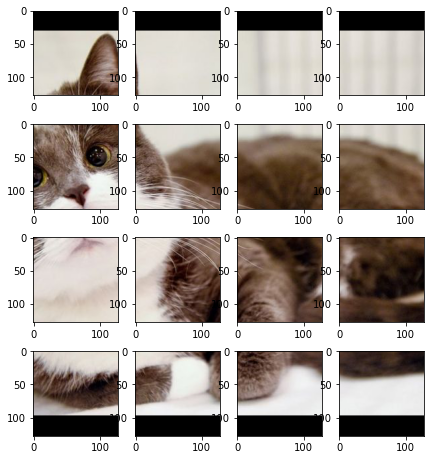

In [7]:
fig, axs = plt.subplots(4, 4,figsize=(7, 8))

for i in range(4) :
 for j in range(4) :
    X = x[0,:,i,j].reshape(patch_size,patch_size,3)
    axs[i, j].imshow(X.numpy())

# 2

In [10]:
patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b h w (p1 p2 c)', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 4, 4, 49152])

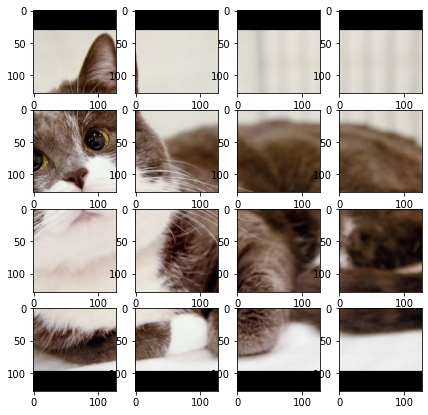

In [11]:
fig, axs = plt.subplots(4, 4,figsize=(7, 7))

for i in range(4) :
 for j in range(4) :
    X = x[0,i,j,:].reshape(patch_size,patch_size,3)
    axs[i, j].imshow(X.numpy())

# 3

In [12]:
patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b  (p1 p2 c) (h w)', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 49152, 16])

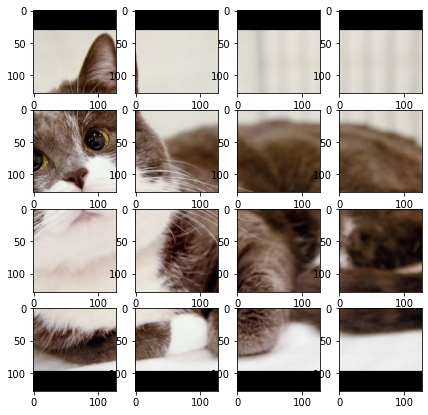

In [13]:
fig, axs = plt.subplots(4, 4,figsize=(7, 7))

count = 0

for i in range(4) :
 for j in range(4) :
    X = x[0,:,count].reshape(patch_size,patch_size,3)
    axs[i, j].imshow(X.numpy())
    count +=1